In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Data Understanding

In [2]:
loan = pd.read_csv('C:\\Users\\SunaynaPC\\Downloads\\loan\\loan.csv')
loan

C:\Users\SunaynaPC\AppData\Local\Temp\ipykernel_35428\4245973293.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('C:\\Users\\SunaynaPC\\Downloads\\loan\\loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Checking Rows With null entries__

In [3]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Data Cleaning and Manipulation

__Removing records where null percentage__ 

In [4]:
#Removing records where null percentage 
null_percentage=loan.isnull().sum()/loan.shape[0]
columns=null_percentage[null_percentage>0.90].keys()
loan=loan.drop(columns,axis=1)
loan.shape

(39717, 55)

__cleaning irrelevant columns__

In [5]:
#cleaning irrelevant columns having null values
loan=loan.drop("mths_since_last_delinq",axis=1)
loan=loan.drop("desc",axis=1)

#cleaning irrelevant columns
loan=loan.drop("url",axis=1)
loan=loan.drop("zip_code",axis=1)

#Removed title as purpose already providing same info
loan=loan.drop("title",axis=1)


#no categorization available in the columns
loan=loan.drop("initial_list_status",axis=1)
loan=loan.drop("policy_code",axis=1)
loan=loan.drop("pymnt_plan",axis=1)
loan=loan.drop("application_type",axis=1)
loan=loan.drop("acc_now_delinq",axis=1)
loan=loan.drop("chargeoff_within_12_mths",axis=1)
loan=loan.drop("delinq_amnt",axis=1)
loan=loan.drop("tax_liens",axis=1)
loan=loan.drop("collections_12_mths_ex_med",axis=1)


#Customer behavior variables
loan=loan.drop("delinq_2yrs",axis=1)
loan=loan.drop("earliest_cr_line",axis=1)
loan=loan.drop("inq_last_6mths",axis=1)
loan=loan.drop("open_acc",axis=1)
loan=loan.drop("revol_bal",axis=1)
loan=loan.drop("revol_util",axis=1)
loan=loan.drop("total_acc",axis=1)
loan=loan.drop("out_prncp",axis=1)
loan=loan.drop("out_prncp_inv",axis=1)
loan=loan.drop("total_pymnt",axis=1)
loan=loan.drop("total_pymnt_inv",axis=1)
loan=loan.drop("total_rec_prncp",axis=1)
loan=loan.drop("total_rec_int",axis=1)
loan=loan.drop("total_rec_late_fee",axis=1)
loan=loan.drop("recoveries",axis=1)
loan=loan.drop("collection_recovery_fee",axis=1)
loan=loan.drop("last_pymnt_d",axis=1)
loan=loan.drop("last_pymnt_amnt",axis=1)
loan=loan.drop("last_credit_pull_d",axis=1)

loan.shape

(39717, 22)

__Imputing null values__

In [7]:
#Filling with Unknown where employee title is not present
loan["emp_title"]=loan["emp_title"].fillna("Unkown")

In [8]:
loan["pub_rec"].corr(loan["pub_rec_bankruptcies"])

0.8473050197507596

In [9]:
#Based on correlation between these two variables substituting the values
loan["pub_rec_bankruptcies"]=loan["pub_rec_bankruptcies"].fillna(loan["pub_rec"])
loan=loan.drop("pub_rec",axis=1)
loan.shape

(39717, 21)

In [10]:
#Filling with Unknown where employee length is not present
loan["emp_length"]=loan["emp_length"].fillna("Unkown")

__Refining Values to get new columns__

In [11]:
#Refining values
loan["int_rate"]=loan["int_rate"].str.replace('%','').astype(float)
loan["term"]=loan["term"].str.replace(' months','').astype(int)
loan.shape

(39717, 21)

In [12]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

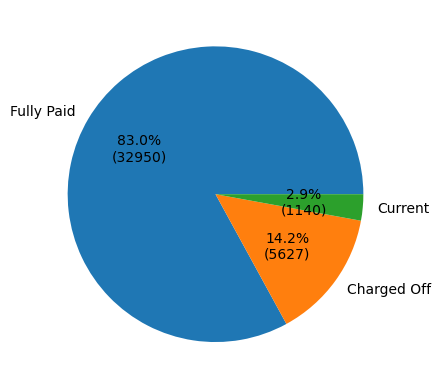

In [13]:
loan_data=loan['loan_status'].value_counts()
plt.pie(loan_data,labels = loan_data.index,autopct=autopct_format(loan_data))
plt.show()

__Removing undeterministic value__

In [14]:
#Removing loan status as current as it doesn't provide input to problem statement
loan.drop(loan[loan['loan_status']== 'Current'].index, inplace = True)
loan.shape
final_loan_data_cleaned=loan
final_loan_data_cleaned.dtypes

id                        int64
member_id                 int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int32
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### Data Analysis

##### Data Undestanding after cleaning
__Checking number of categorical and numerical columns available__

In [15]:
numeric_data = final_loan_data_cleaned.select_dtypes(include = [np.number])

categorical_data = final_loan_data_cleaned.select_dtypes(exclude = [np.number])

print('There are {0} numerical and {1} categorical features in the loan data'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 11 numerical and 10 categorical features in the loan data


###### Univariate Analysis

In [16]:
final_loan_data_cleaned.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,pub_rec_bankruptcies
count,3.857700e+04,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000
mean,6.763787e+05,8.422843e+05,11047.025430,10784.058506,10222.481123,41.898437,11.932219,322.466318,6.877797e+04,13.272727,0.043238
std,2.092639e+05,2.644519e+05,7348.441646,7090.306027,7022.720644,10.333136,3.691327,208.639215,6.421868e+04,6.673044,0.204159
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,36.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000
25%,5.120330e+05,6.611310e+05,5300.000000,5200.000000,5000.000000,36.000000,8.940000,165.740000,4.000000e+04,8.130000,0.000000
50%,6.564230e+05,8.392920e+05,9600.000000,9550.000000,8733.440000,36.000000,11.710000,277.860000,5.886800e+04,13.370000,0.000000
75%,8.291460e+05,1.037336e+06,15000.000000,15000.000000,14000.000000,36.000000,14.380000,425.550000,8.200000e+04,18.560000,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,29.990000,2.000000


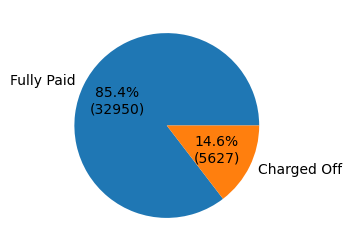

In [20]:
final_loan=final_loan_data_cleaned['loan_status'].value_counts()
plt.figure(figsize=(3, 3))
plt.pie(final_loan,labels = final_loan.index,autopct=autopct_format(final_loan))
plt.show()

__Checking All numerical variables__

Checking outliers for requested loan amount, funded amount suggested and funded amount approved by investers

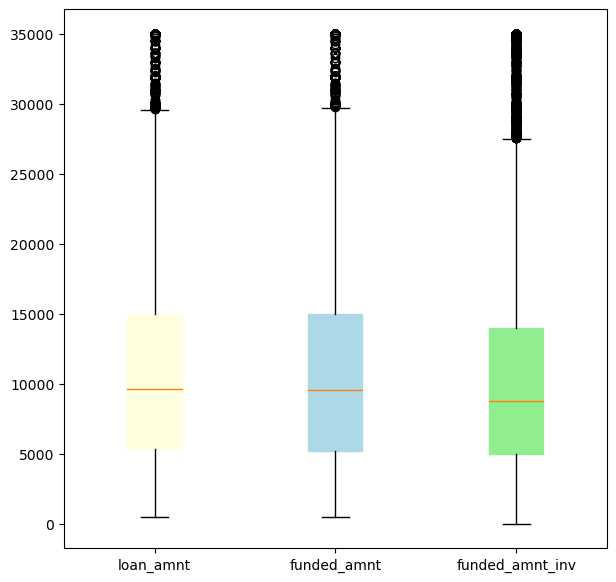

In [18]:
plt.figure(figsize=(7, 7))
colors = ['lightyellow', 'lightblue', 'lightgreen']
box=plt.boxplot(final_loan_data_cleaned[['loan_amnt','funded_amnt','funded_amnt_inv']],patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_color(color)
plt.xticks([1,2,3],['loan_amnt','funded_amnt','funded_amnt_inv'])
plt.show()

checking loan amount distribution and amounts which have higher number of requests

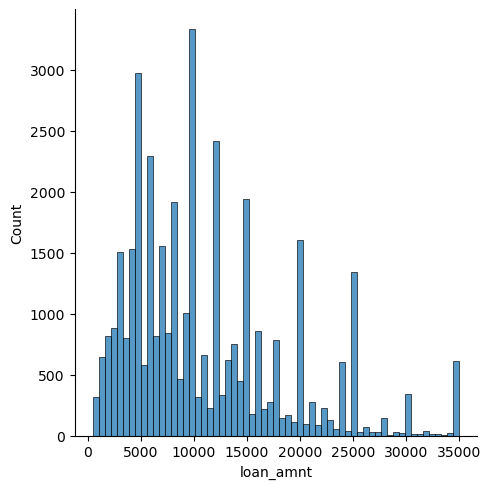

In [21]:
loan_amnt_dist = final_loan_data_cleaned["loan_amnt"]
sns.displot(loan_amnt_dist)

Box Plot to compare annual income and requested loan amount

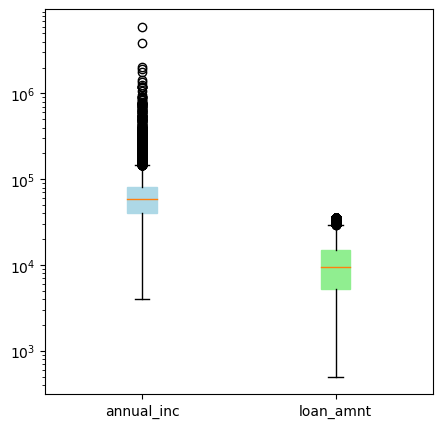

In [22]:
plt.figure(figsize=(5, 5))
plt.yscale('log')
colors = ['lightblue', 'lightgreen']
box=plt.boxplot(final_loan_data_cleaned[['annual_inc','loan_amnt']],patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_color(color)
plt.xticks([1,2],['annual_inc','loan_amnt'])
plt.show()

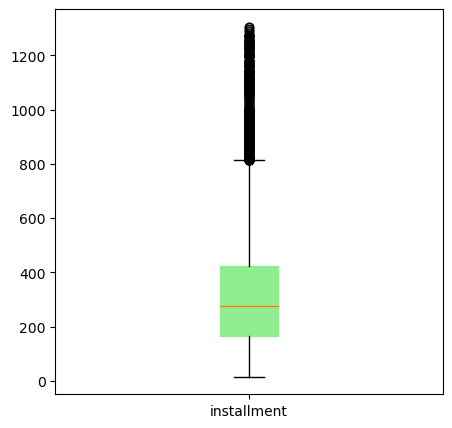

In [23]:
plt.figure(figsize=(5, 5))
box=plt.boxplot(final_loan_data_cleaned[['installment']],patch_artist=True)
box['boxes'][0].set_color('lightgreen')
plt.xticks([1],['installment'])
plt.show()

Box Plot to check outliers in dti

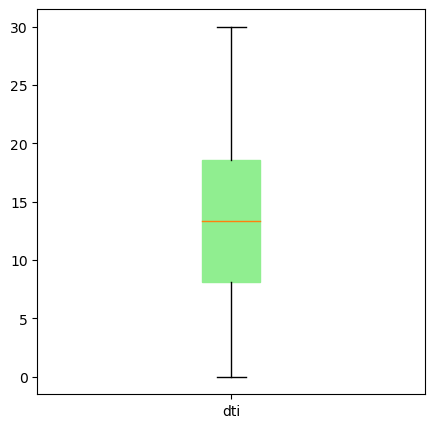

In [24]:
plt.figure(figsize=(5, 5))
box=plt.boxplot(final_loan_data_cleaned[['dti']],patch_artist=True)
box['boxes'][0].set_color('lightgreen')
plt.xticks([1],['dti'])
plt.show()

__removing outliers in income, installment, loan amount, funded amount and funded amount inv
Same with installment__

In [25]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["annual_inc"] < final_loan_data_cleaned["annual_inc"].quantile(0.99)]
final_loan_data_cleaned["annual_inc"].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [26]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["installment"] < final_loan_data_cleaned["installment"].quantile(0.99)]
final_loan_data_cleaned["installment"].describe()

count    37809.000000
mean       312.538108
std        192.994925
min         15.690000
25%        164.560000
50%        273.780000
75%        413.710000
max        920.850000
Name: installment, dtype: float64

In [27]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["loan_amnt"] < final_loan_data_cleaned["loan_amnt"].quantile(0.99)]
final_loan_data_cleaned["loan_amnt"].describe()

count    37413.000000
mean     10490.477241
std       6545.382409
min        500.000000
25%       5000.000000
50%       9300.000000
75%      15000.000000
max      31825.000000
Name: loan_amnt, dtype: float64

In [28]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["funded_amnt"] < final_loan_data_cleaned["funded_amnt"].quantile(0.99)]
final_loan_data_cleaned["funded_amnt"].describe()

count    37035.000000
mean     10062.051438
std       6055.432555
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      27525.000000
Name: funded_amnt, dtype: float64

In [29]:
final_loan_data_cleaned = final_loan_data_cleaned[final_loan_data_cleaned["funded_amnt_inv"] < final_loan_data_cleaned["funded_amnt_inv"].quantile(0.99)]
final_loan_data_cleaned["funded_amnt_inv"].describe()

count    36643.000000
mean      9351.307474
std       5801.819214
min          0.000000
25%       4975.000000
50%       8000.000000
75%      12889.555435
max      24974.448730
Name: funded_amnt_inv, dtype: float64

Getting purpose count mapping

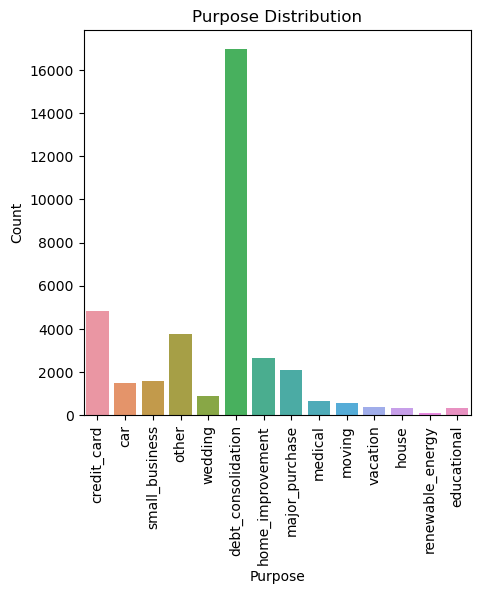

In [30]:
plt.figure(figsize=(5, 5))
sns.countplot(x=final_loan_data_cleaned["purpose"])
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Purpose Distribution')
plt.xticks(rotation = 90)
plt.show()

Getting Loan distribution

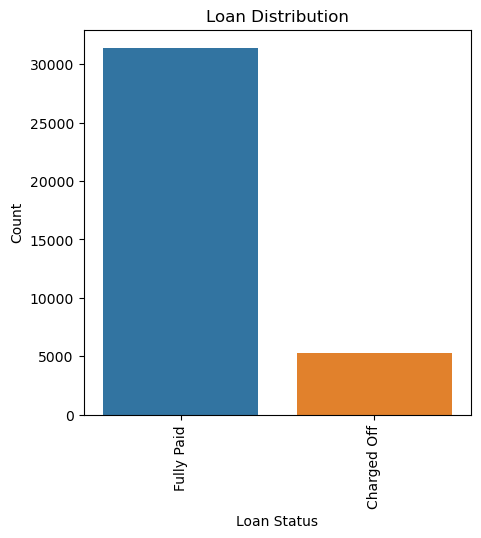

In [31]:
plt.figure(figsize=(5, 5))
sns.countplot(x=final_loan_data_cleaned["loan_status"])
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Distribution')
plt.xticks(rotation = 90)
plt.show()

Home ownership distribution

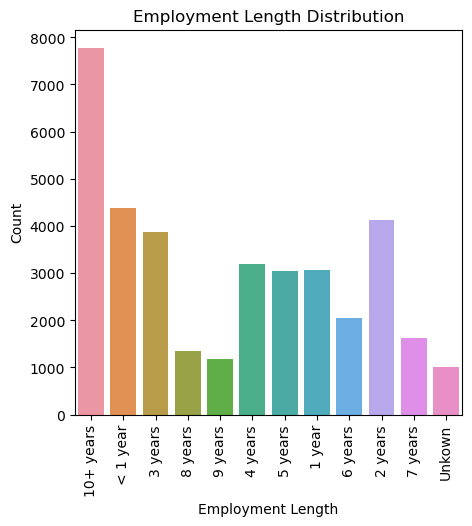

In [32]:
plt.figure(figsize=(5, 5))
sns.countplot(x=final_loan_data_cleaned["emp_length"])
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Employment Length Distribution')
plt.xticks(rotation = 90)
plt.show()

Home ownership vs loan status

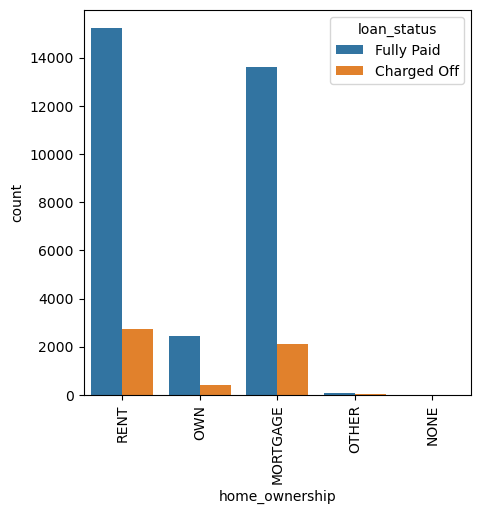

In [33]:
plt.figure(figsize=(5, 5))
sns.countplot(x='home_ownership',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Loan amount vs loan status

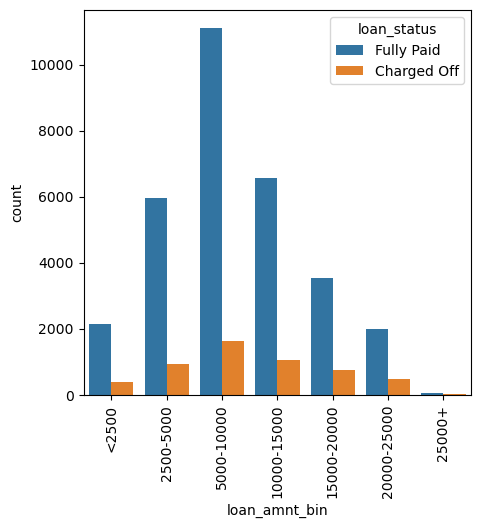

In [40]:
plt.figure(figsize=(5, 5))
final_loan_data_cleaned['loan_amnt_bin'] = pd.cut(final_loan_data_cleaned['loan_amnt'], [0, 2500, 5000, 10000, 15000, 20000, 25000,np.inf], labels=['<2500', '2500-5000', '5000-10000','10000-15000','15000-20000','20000-25000','25000+'])
sns.countplot(x='loan_amnt_bin',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

loan amount vs verification status

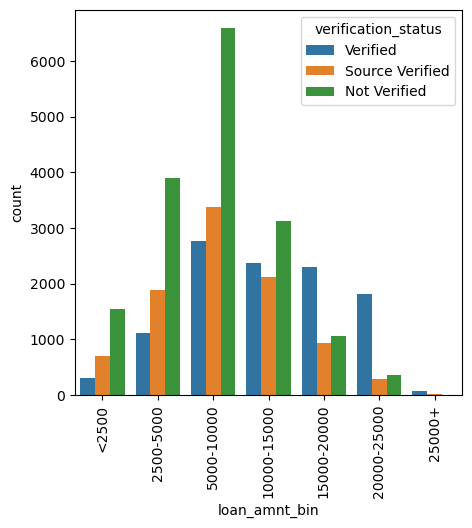

In [41]:
plt.figure(figsize=(5, 5))
sns.countplot(x='loan_amnt_bin',hue='verification_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

verification status vs loan status 

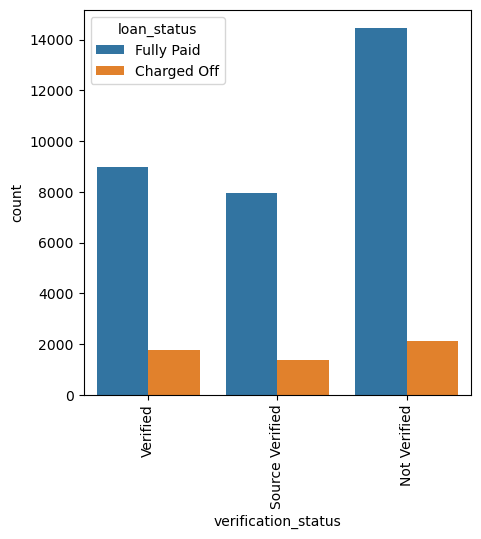

In [42]:
plt.figure(figsize=(5, 5))
sns.countplot(x='verification_status',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Loan Term vs loan amount

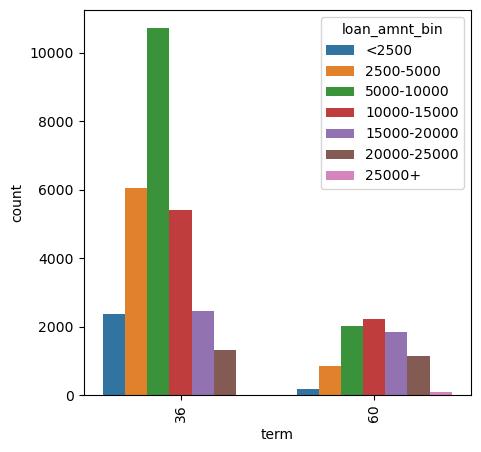

In [44]:
plt.figure(figsize=(5, 5))
sns.countplot(x='term',hue='loan_amnt_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Loan term vs loan status

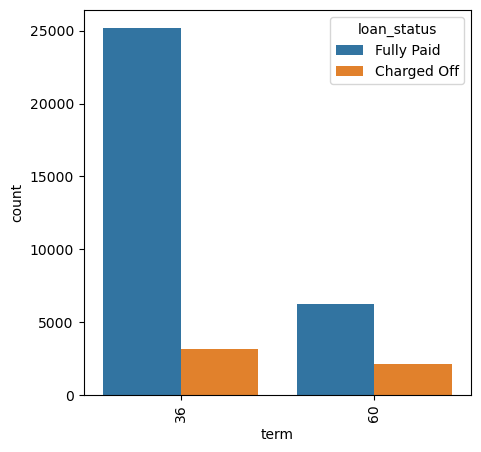

In [45]:
plt.figure(figsize=(5, 5))
sns.countplot(x='term',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Home ownership vs loan amount

plt.figure(figsize=(5, 5))
sns.countplot(x='home_ownership',hue='loan_amnt_bin', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

public rec bankrupcies vs loan status 

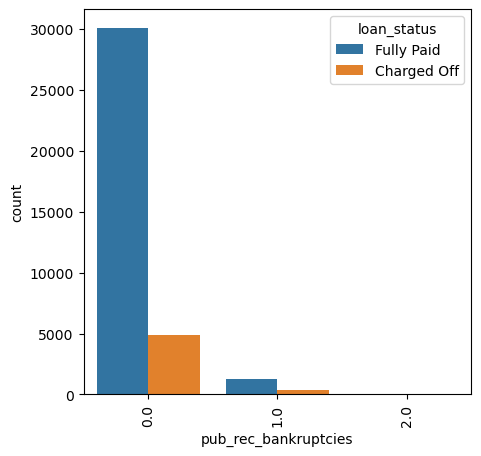

In [50]:
plt.figure(figsize=(5, 5))
sns.countplot(x='pub_rec_bankruptcies',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

public rec bankrupcies vs verification status

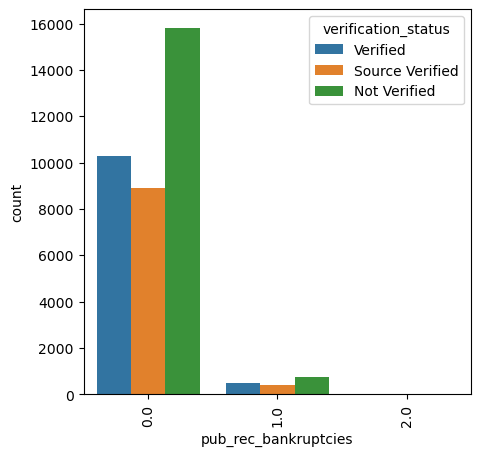

In [51]:
plt.figure(figsize=(5, 5))
sns.countplot(x='pub_rec_bankruptcies',hue='verification_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()

Employment length vs loan status

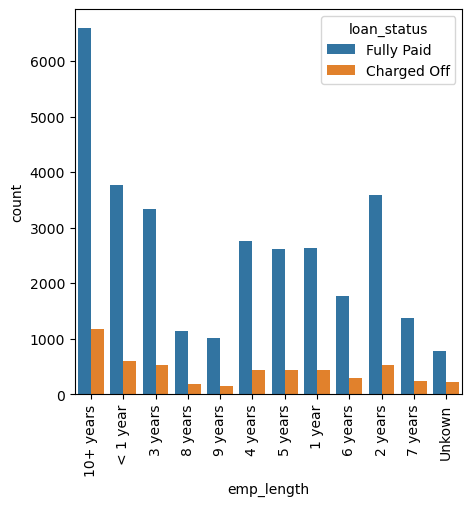

In [48]:
plt.figure(figsize=(5, 5))
sns.countplot(x='emp_length',hue='loan_status', data=final_loan_data_cleaned)
plt.xticks(rotation=90)
plt.show()